In [50]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split

In [51]:
std_df = pd.read_csv("F:\dataset_for_ML\supervised\student_performance_prediction\student_performance_prediction.csv")

In [52]:
temp_df = std_df.copy()

In [53]:
temp_df.shape

(40000, 7)

In [54]:
temp_df.head()

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
0,S00001,12.5,NaN,75.0,Yes,Master,Yes
1,S00002,9.3,95.3,60.6,No,High School,No
2,S00003,13.2,NaN,64.0,No,Associate,No
3,S00004,17.6,76.8,62.4,Yes,Bachelor,No
4,S00005,8.8,89.3,72.7,No,Master,No


In [55]:
temp_df.isna().sum()/temp_df.shape[0]

Student ID                                     0.000000
Study Hours per Week                           0.049875
Attendance Rate                                0.049800
Previous Grades                                0.049850
Participation in Extracurricular Activities    0.050000
Parent Education Level                         0.050000
Passed                                         0.050000
dtype: float64

In [56]:
temp_df.duplicated().sum()

0

In [57]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 7 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Student ID                                   40000 non-null  object 
 1   Study Hours per Week                         38005 non-null  float64
 2   Attendance Rate                              38008 non-null  float64
 3   Previous Grades                              38006 non-null  float64
 4   Participation in Extracurricular Activities  38000 non-null  object 
 5   Parent Education Level                       38000 non-null  object 
 6   Passed                                       38000 non-null  object 
dtypes: float64(3), object(4)
memory usage: 2.1+ MB


In [58]:
temp_df.select_dtypes(["float"]).describe()

,Study Hours per Week,Attendance Rate,Previous Grades
count,38005.000000,38008.000000,38006.000000
mean,9.962744,75.276323,65.440107
std,5.031154,20.393418,16.503119
min,-12.300000,-14.300000,8.300000
25%,6.600000,61.600000,55.100000
50%,10.000000,75.300000,65.200000
75%,13.400000,88.800000,75.200000
max,32.400000,150.200000,200.000000


In [59]:
temp_df.dropna(inplace=True)

In [60]:
temp_df =  temp_df[(temp_df["Study Hours per Week"]>0) & (temp_df["Attendance Rate"] > 0)]

In [63]:
temp_df.select_dtypes(["float"]).describe(include="all")

,Study Hours per Week,Attendance Rate,Previous Grades
count,28683.000000,28683.000000,28683.000000
mean,10.277060,75.335777,65.414918
std,4.699371,20.377631,16.541461
min,0.100000,0.500000,8.300000
25%,6.900000,61.600000,55.000000
50%,10.100000,75.300000,65.200000
75%,13.500000,88.900000,75.200000
max,32.400000,150.200000,200.000000


In [62]:
temp_df.isna().sum()

Student ID                                     0
Study Hours per Week                           0
Attendance Rate                                0
Previous Grades                                0
Participation in Extracurricular Activities    0
Parent Education Level                         0
Passed                                         0
dtype: int64

In [67]:
temp_df.tail()

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
39994,S39995,5.1,92.1,46.1,Yes,Doctorate,No
39995,S39996,15.6,93.8,51.4,Yes,Master,No
39996,S39997,11.3,66.4,64.2,No,Doctorate,Yes
39997,S39998,13.1,65.6,38.1,No,Bachelor,No
39999,S40000,11.8,55.1,68.5,No,Bachelor,Yes


<Axes: xlabel='Attendance Rate', ylabel='Previous Grades'>

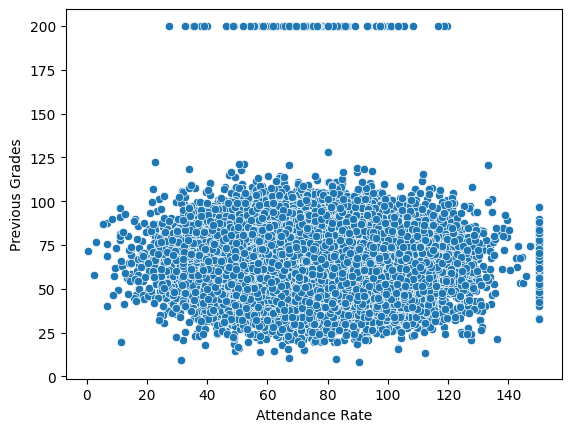

In [75]:
sns.scatterplot(data=temp_df,x='Attendance Rate',y='Previous Grades')